In [80]:
import os 
import pandas as pd
import numpy as np
DATA_PATH = "C:\\Users\\anu\\Kaggle"
IMAGES_PATH = "C:\\Users\\anu\\Kaggle"

In [81]:
def load_data(data_path = DATA_PATH):
    csv = os.path.join(data_path,"suicide_rates_overview_1985_to_2016.csv")
    return pd.read_csv(csv)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [82]:
sui = load_data();

In [83]:
sui.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [68]:
sui.shape

(27820, 12)

In [69]:
sui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [70]:
## Renaming few of the columns
sui.rename(columns={"suicides/100k pop":"suicides_per_100k_pop","HDI for year":"HDI_for_year" },inplace=True)
sui.rename(columns={" gdp_for_year ($)":"gdp_for_year_$","gdp_per_capita ($)":"gdp_per_capita_$" },inplace=True)

In [84]:
##All are not null columns, therefore there wont be any null values in any of the column for given dataset
##Just a precautionary check
sui.isnull().sum() ## looks like HDI for year has 19456 null value.

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [77]:
sui['country'].value_counts().head(10) ## Austria has highest number of Suicides
sui['country'].value_counts().tail(10) ## Mongolia has highest number of Suicides

United Arab Emirates      72
Nicaragua                 72
Saint Kitts and Nevis     36
Oman                      36
San Marino                36
Bosnia and Herzegovina    24
Macau                     12
Dominica                  12
Cabo Verde                12
Mongolia                  10
Name: country, dtype: int64

In [87]:
sui.loc[sui['country'] == 'Mongolia',] ## Mongolia has lowest number of Suicide count

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16936,Mongolia,2016,male,25-34 years,127,290660,43.69,Mongolia2016,NaN,"11,183,458,131",4145,Millenials
16937,Mongolia,2016,male,35-54 years,127,375631,33.81,Mongolia2016,NaN,"11,183,458,131",4145,Generation X
16938,Mongolia,2016,male,15-24 years,85,252851,33.62,Mongolia2016,NaN,"11,183,458,131",4145,Millenials
16939,Mongolia,2016,male,55-74 years,29,113527,25.54,Mongolia2016,NaN,"11,183,458,131",4145,Boomers
16940,Mongolia,2016,male,75+ years,3,15349,19.55,Mongolia2016,NaN,"11,183,458,131",4145,Silent
16941,Mongolia,2016,female,75+ years,3,26305,11.40,Mongolia2016,NaN,"11,183,458,131",4145,Silent
16942,Mongolia,2016,female,15-24 years,18,246805,7.29,Mongolia2016,NaN,"11,183,458,131",4145,Millenials
16943,Mongolia,2016,female,25-34 years,15,292237,5.13,Mongolia2016,NaN,"11,183,458,131",4145,Millenials
16944,Mongolia,2016,female,35-54 years,15,406028,3.69,Mongolia2016,NaN,"11,183,458,131",4145,Generation X
16945,Mongolia,2016,female,55-74 years,1,148196,0.67,Mongolia2016,NaN,"11,183,458,131",4145,Boomers


In [146]:
## Basic Column Vs Column Check
sui.groupby(['country','year'])['suicides_no'].sum() ## Total number of suicide for each year from each country

country              year
Albania              1987      73
                     1988      63
                     1989      68
                     1992      47
                     1993      73
                     1994      50
                     1995      88
                     1996      89
                     1997     170
                     1998     154
                     1999     139
                     2000      54
                     2001     119
                     2002     133
                     2003     124
                     2004     146
                     2005       0
                     2006       0
                     2007     124
                     2008     160
                     2009       0
                     2010      96
Antigua and Barbuda  1985       0
                     1986       0
                     1987       0
                     1988       0
                     1989       0
                     1990       1
                     1

In [165]:
## Finding important attributes
print("total number of suicide = %s , Total_number of Country %s , Total_number of years %s" 
      %(sui['suicides_no'].sum(),len(sui['country'].unique()),len(sui['year'].unique())))


total number of suicide = 6748420 , Total_number of Country 101 , Total_number of years 32


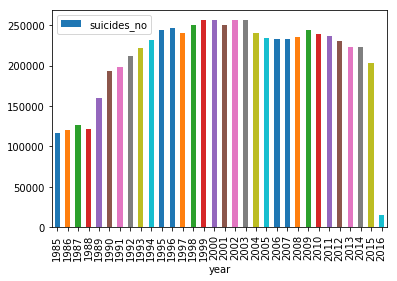

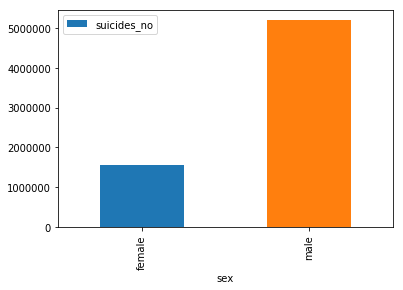

In [184]:
sui.groupby(['year'])['suicides_no'].sum().reset_index().plot(kind="bar",x="year",y="suicides_no")
## looks like year 1999 to year 2010 had higher suicide rate
sui.groupby(['sex'])['suicides_no'].sum().reset_index().plot(kind="bar",x="sex",y="suicides_no") 
## looks like men are more suicidal than woman
plt.show()

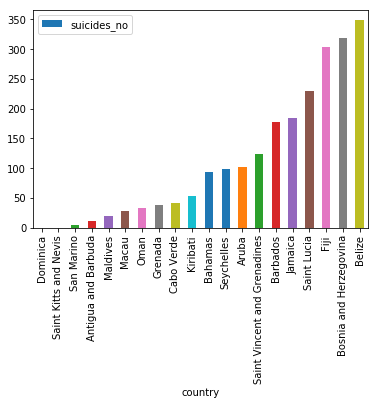

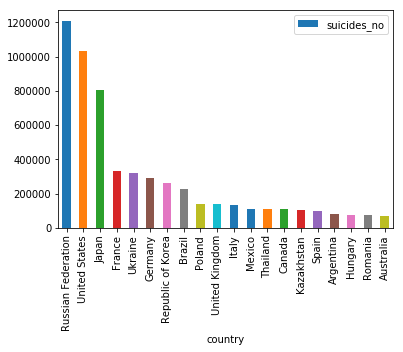

In [189]:
sui.groupby(['country'])['suicides_no'].sum().reset_index().sort_values(by=['suicides_no']).head(20).plot(kind="bar",x="country",y="suicides_no") 
## country wise Suicide count in ascending order(first 20)
sui.groupby(['country'])['suicides_no'].sum().reset_index().sort_values(by='suicides_no', ascending=False).head(20).plot(kind="bar",x="country",y="suicides_no") 
## country wise Suicide count in descending order(first 20)
plt.show()

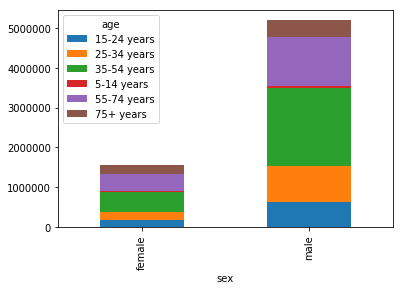

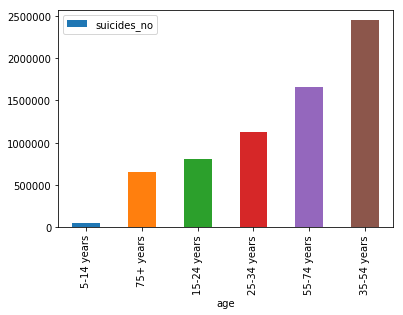

In [200]:
sui.groupby(['sex','age'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)
## 35 to 54 year age group has high suicide count in both sex group
sui.groupby(['age'])['suicides_no'].sum().reset_index().sort_values(by=['suicides_no']).head(20).plot(kind="bar",x="age",y="suicides_no") 
## age wise Suicide count 
plt.show()

In [206]:
sui.info()
## Need to explore other variables like population , suicides/100k pop  , country-year     , HDI for year    ,gdp_for_year ($)
            ## gdp_per_capita ($), generation            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Saving figure Fields_level_histogram


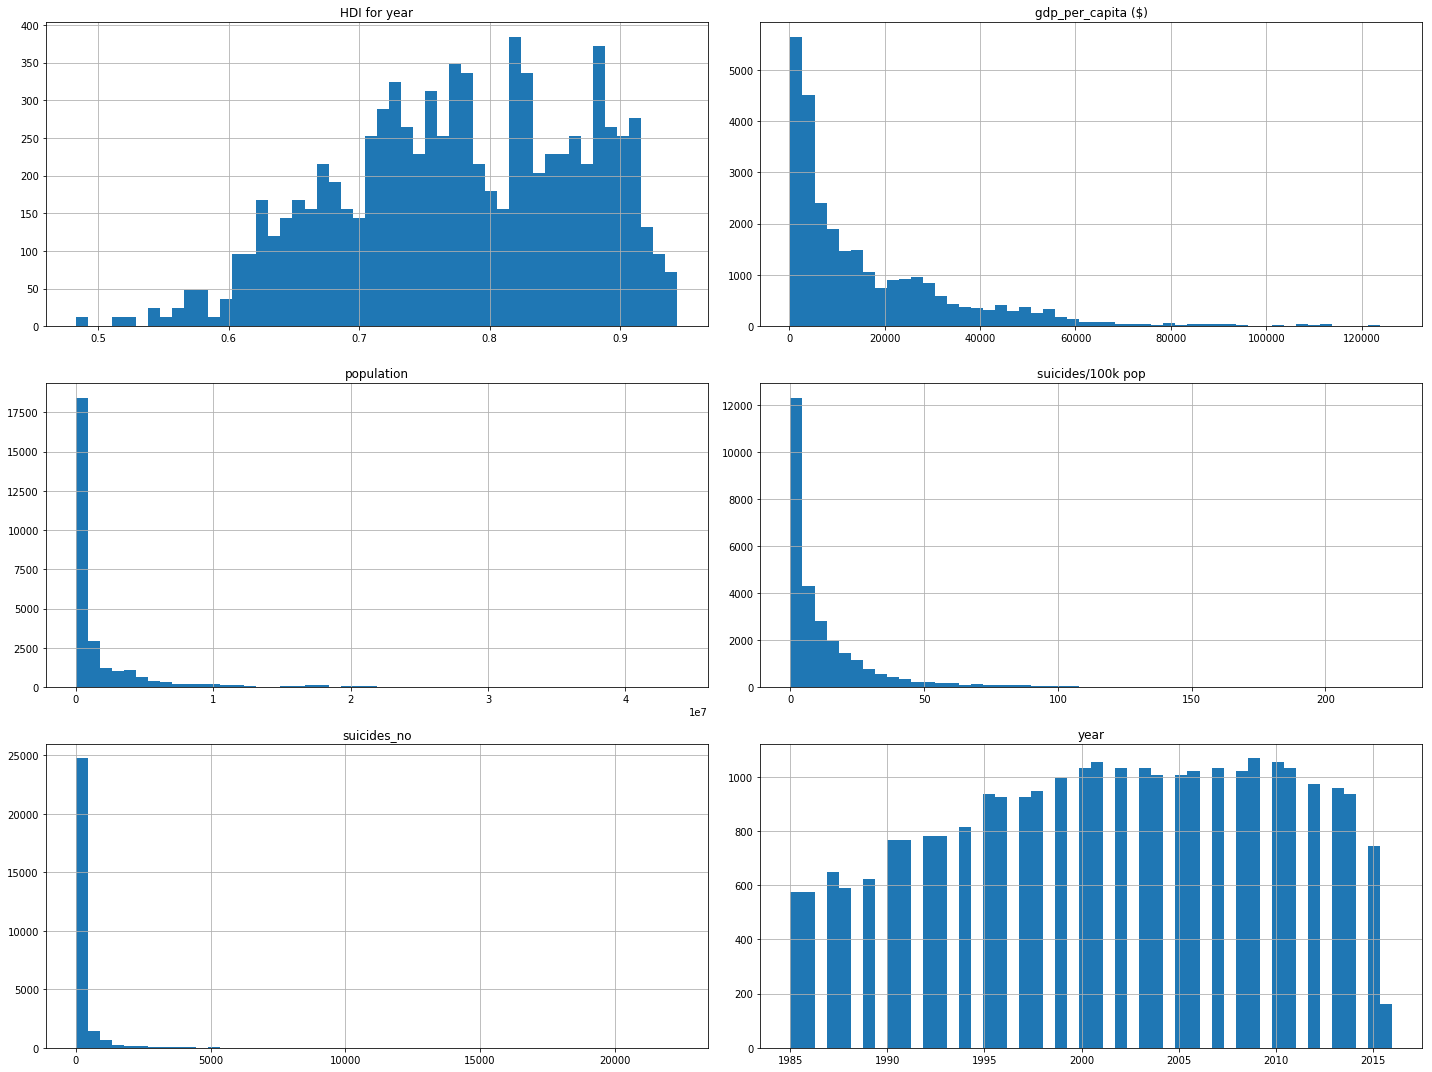

In [188]:
## to plot pretty pics
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sui.hist(bins=100,figsize=(20,15))
save_fig("Fields_level_histogram")
plt.show()

## Histogram is not giving much info